In [74]:
import cv2 as cv
import matplotlib.pyplot as plt
import numpy as np
from utils.dataset_custom import CustomDataTest
from utils.k_means import KMeans
import matplotlib.pyplot as plt
from matplotlib import colormaps

Total de imagens: 32


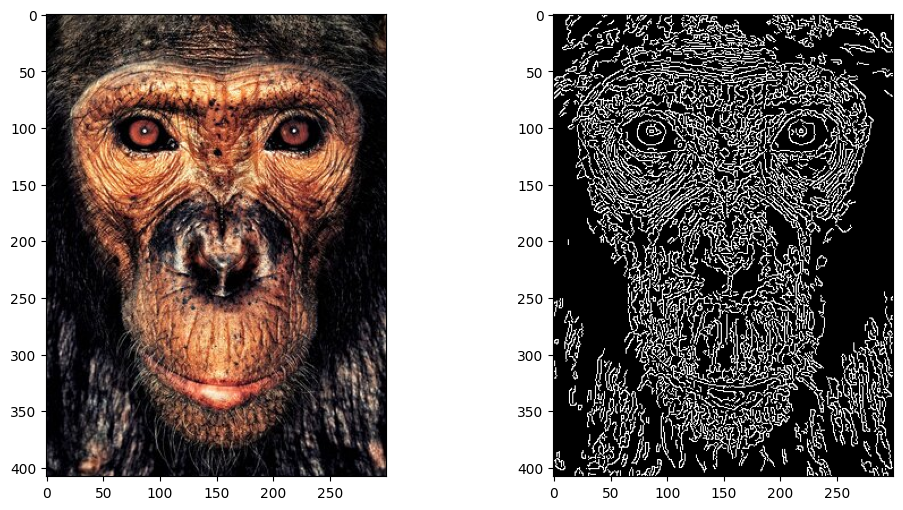

In [75]:
from utils.feature_extractor import extract_canny_features, extract_canny_features_from_dataset

data = CustomDataTest("Apes/")
image_path = data.__getitem__(29)

image = cv.imread(image_path)
image_sobel = extract_canny_features(image)

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.imshow(cv.cvtColor(image, cv.COLOR_BGR2RGB))
plt.subplot(1,2,2)
plt.imshow(image_sobel, cmap="gray")
cv.waitKey(0)
cv.destroyAllWindows()

Total de imagens: 32


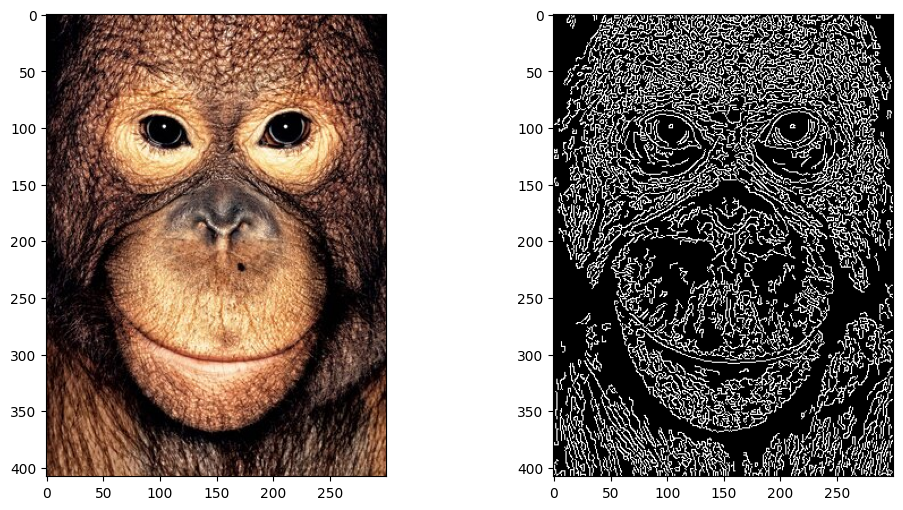

In [76]:
data = CustomDataTest("Apes/")
image_path = data.__getitem__(31)

image = cv.imread(image_path)
image_sobel = extract_canny_features(image)

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.imshow(cv.cvtColor(image, cv.COLOR_BGR2RGB))
plt.subplot(1,2,2)
plt.imshow(image_sobel, cmap="gray")
cv.waitKey(0)
cv.destroyAllWindows()

In [77]:
n_cluster = 5
model = KMeans(n_cluster=n_cluster, max_iter=10)
images_sobel = extract_canny_features_from_dataset(data.path_imgs)
model.fit(X=images_sobel)
images_sobel.shape

iter: 0
iter: 1
iter: 2
iter: 3
iter: 4
iter: 5
iter: 6
Convergiu na iteração: 6


(32, 1)

In [78]:
labels = model.predict(images_sobel)

In [79]:
print(sorted(images_sobel))

[array([11482.], dtype=float32), array([13413.], dtype=float32), array([14324.], dtype=float32), array([15467.], dtype=float32), array([15561.], dtype=float32), array([16128.], dtype=float32), array([16403.], dtype=float32), array([16570.], dtype=float32), array([16689.], dtype=float32), array([16853.], dtype=float32), array([17039.], dtype=float32), array([17064.], dtype=float32), array([17870.], dtype=float32), array([17915.], dtype=float32), array([18093.], dtype=float32), array([18436.], dtype=float32), array([18955.], dtype=float32), array([19130.], dtype=float32), array([19518.], dtype=float32), array([20411.], dtype=float32), array([20656.], dtype=float32), array([21204.], dtype=float32), array([21984.], dtype=float32), array([21990.], dtype=float32), array([22518.], dtype=float32), array([22739.], dtype=float32), array([23741.], dtype=float32), array([24218.], dtype=float32), array([24649.], dtype=float32), array([26111.], dtype=float32), array([26943.], dtype=float32), array([

In [80]:
images_sobel

array([[18093.],
       [14324.],
       [22739.],
       [17915.],
       [16853.],
       [15561.],
       [24649.],
       [16570.],
       [20656.],
       [17039.],
       [23741.],
       [22518.],
       [16689.],
       [19518.],
       [21990.],
       [21984.],
       [26943.],
       [18955.],
       [17870.],
       [24218.],
       [11482.],
       [17064.],
       [21204.],
       [20411.],
       [18436.],
       [15467.],
       [13413.],
       [16403.],
       [16128.],
       [26111.],
       [19130.],
       [29448.]], dtype=float32)

In [81]:
images_sobel[labels == 2]

array([[29448.]], dtype=float32)

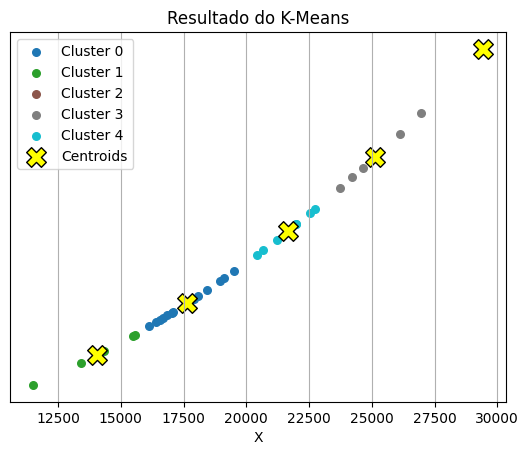

In [82]:
cmap = colormaps.get_cmap('tab10').resampled(n_cluster)
colors = [cmap(i) for i in range(n_cluster)]

# criar eixo y ilustrativo

func = lambda x: x**2 + 1
y_base = func(images_sobel)
y_centroids = func(model.centroids)

# Plotar os pontos de cada cluster
for i in range(n_cluster):
    plt.scatter(images_sobel[labels == i], 
                y_base[labels == i], 
                s=30, color=colors[i], label=f'Cluster {i}')

plt.scatter(model.centroids, 
            y_centroids, 
            s=200, color='yellow', edgecolor='black', label='Centroids', marker='X')

plt.title('Resultado do K-Means')
plt.xlabel('X')
plt.yticks([])  # Esconde o eixo Y
plt.legend()
plt.grid(True)
plt.show()
